In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import copy
from PIL import Image
import io
from torchvision import transforms
import torch.nn.functional as F

# Stroke

In [ ]:
# model_version x trial x 
confidences = [[[0.7277961813821456, 0.32937568534892336, 0.3239876595461662, 0.2671321701414118, 0.2421907188969846, 0.25871465822212725, 0.4808086054796134, 0.1804303470158747, 0.10411557170480039, 0.08606039095109111, 0.04326502790756546, 0.10913451604655766, 0.10109723119825564, 0.1331675247538613], [0.7277961813821456, 0.2581207440802439, 0.2627029649246974, 0.23085165996390072, 0.09802393002189022, 0.17798667774813842, 0.11518906232875929, 0.1015646512516895, 0.08472206555176424, 0.0890974718193327, 0.10371801313942, 0.18475146456707517, 0.10482365939674605, 0.11875885581935837], [0.7277961813821456, 0.5714296314767329, 0.5341211937117987, 0.49290899484982187, 0.517891945096768, 0.5937762444342798, 0.43003892694999646, 0.3171090363104031, 0.33528611534830133, 0.12906283645716937, 0.15225353820136311, 0.06760152076149231, 0.07452530288969347, 0.21515309152443937], [0.7277961813821456, 0.4387196981855939, 0.4650369994062237, 0.5095312697066374, 0.47885061709578824, 0.4819310083564969, 0.2633099689759683, 0.31854383892671023, 0.1524746519250249, 0.2013117454253301, 0.21554367798438617, 0.17521858951282315, 0.2976824599232094, 0.18829112758289573], [0.7277961813821456, 0.5041563730738651, 0.5335516985664435, 0.35904901169261166, 0.31153910870361184, 0.34361168980038587, 0.29816725636836905, 0.33503060348862673, 0.26245099179270254, 0.5028823512270542, 0.17861529935559672, 0.22308721744810148, 0.13787835786974267, 0.17076892123063697], [0.7277961813821456, 0.3473928330450742, 0.3603651740145225, 0.17711828275886007, 0.21523165581531484, 0.21726048679689342, 0.25816251225454195, 0.2534074347435836, 0.26439475925806616, 0.11502129783095724, 0.011684204363632206, 0.06632287172377213, 0.12328818424136763, 0.028456154433435115], [0.7277961813821456, 0.4443612909135072, 0.4157540095711374, 0.37086897100764415, 0.3139495751117215, 0.36092881246918296, 0.19339547779533403, 0.3222469838396803, 0.16942753315899511, 0.10201131082144081, 0.0996472330329595, 0.12102882188658312, 0.22325560190768218, 0.23375279604748406], [0.7277961813821456, 0.39504127018378166, 0.3832668656291464, 0.19649217175046646, 0.21482150701280567, 0.25149571036170465, 0.34537701045935254, 0.2945442411082655, 0.23784113934781007, 0.20285901382273613, 0.0558630884759884, 0.05558250143167377, 0.08511845888998608, 0.1308461788163669], [0.7277961813821456, 0.34636496264166217, 0.4315620518435767, 0.3469826073555245, 0.4846072646770745, 0.36792462678394483, 0.291843832410741, 0.2699935834751338, 0.24715012846112097, 0.3160272207253811, 0.23456050040768472, 0.24918350960341823, 0.2146331673651293, 0.20822287294518302], [0.7277961813821456, 0.5732355299251685, 0.5461696495331125, 0.5312323042102799, 0.5317173188194808, 0.5390571498469218, 0.5028290146880721, 0.44141924305175506, 0.5030817688830347, 0.46630728088994144, 0.26631009114030346, 0.23559847005020057, 0.060523685244417036, 0.015515852141375555]], [[0.738185744471848, 0.1990393621170597, 0.2501396975396114, 0.22814607677808904, 0.17034432593443738, 0.23490113164777124, 0.2240426472616363, 0.12329400856898683, 0.12200821148671978, 0.10648170628787552, 0.10950250920055726, 0.12383927898419692, 0.15741471414307098, 0.1449067815251842], [0.738185744471848, 0.6107884620024733, 0.49341625525053845, 0.4018474395163684, 0.3722238910481526, 0.41686174061147085, 0.18894296797801874, 0.14864577210757474, 0.269244878341728, 0.051042242355910906, 0.12624195879466116, 0.18907091453863306, 0.1575599492569466, 0.12919767748109834], [0.738185744471848, 0.22304557391924806, 0.18732452627083734, 0.18395834995112786, 0.16464441878442826, 0.12281979977820708, 0.16054326194596552, 0.2818805305651057, 0.2631705677743029, 0.23157057041368315, 0.12574321871145186, 0.1128044355907494, 0.022482759798398682, 0.07979692096099597], [0.738185744471848, 0.36199990834492396, 0.3798427855933575, 0.4145183363734214, 0.37691832276074405, 0.4272603168736895, 0.3827672030878639, 0.35082195623278495, 0.09405595695696621, 0.0915810307439248, 0.18163697360413714, 0.11215443329031127, 0.21720845252890103, 0.06820074107923899], [0.738185744471848, 0.6543375087399909, 0.5783839201000228, 0.449405982507451, 0.5073055909102551, 0.4032729747421385, 0.4058096548266053, 0.285650217393204, 0.33105906379263617, 0.3517652047568754, 0.30170360555123343, 0.3538999557737477, 0.10455829760813729, 0.14895321296002423], [0.738185744471848, 0.49289828613522957, 0.321474987097737, 0.32096692068213784, 0.2216414844876317, 0.23006136815150283, 0.18125081405081114, 0.25010535915219273, 0.20508878784390783, 0.2774562033609663, 0.17091627158187578, 0.18667398563312274, 0.13661456499279495, 0.11574428303455761], [0.738185744471848, 0.28998666302862147, 0.16586898466568176, 0.21645396048294785, 0.1524670928914496, 0.1154656750560353, 0.10532090002020171, 0.11063719006845688, 0.12900368696906186, 0.12076239281367748, 0.10757050401563081, 0.0774190717351156, 0.05977665207764391, 0.11420100288903842], [0.738185744471848, 0.33463801141394756, 0.27035585137855034, 0.4505319157947688, 0.41432194785898613, 0.4286277718233557, 0.3926348135769638, 0.28232956657662495, 0.21002640464736033, 0.1740685618887073, 0.24509988245776185, 0.23674936426075827, 0.20972049557178787, 0.07987672112339235], [0.738185744471848, 0.5165170918015065, 0.0739485526758575, 0.19265420748354783, 0.16212604155834315, 0.17624885984833247, 0.15047248359167642, 0.18054260791976684, 0.12682079533617627, 0.18400622829137023, 0.2126386251444207, 0.10258197004634573, 0.1591491446220433, 0.15337474295186426], [0.738185744471848, 0.3437693504000197, 0.36971016040618554, 0.35044903319297743, 0.2754856869792986, 0.30201395043932333, 0.37143770757584293, 0.24151866907858682, 0.15289622670240738, 0.07954242615304437, 0.20612179530842584, 0.039840728414159685, 0.1356530381766579, 0.13644894040136762]], [[0.7962247636169196, 0.5602356934820546, 0.5023631122947101, 0.5209147075022862, 0.3741450510022105, 0.29488290980285603, 0.11237627152821161, 0.08409373785111535, 0.17868410061331394, 0.19917203495375993, 0.09180812233314181, 0.32455887222406316, 0.0546794183814708, 0.1398917268929674], [0.7962247636169196, 0.6503126313348411, 0.6492673358115678, 0.4352184475816136, 0.47879080842751803, 0.37028544372921296, 0.06708428312574853, 0.06973666939621394, 0.05808645114240953, 0.12855484270532205, 0.16953480052970976, 0.09771675627593474, 0.08750184741215776, 0.07242624519988936], [0.7962247636169196, 0.49870559226436384, 0.5740478927761423, 0.4479203195280196, 0.3362490621502312, 0.3129394557162624, 0.4563413316109443, 0.48342427751482236, 0.2691040819266079, 0.35740870477056247, 0.1014375569478971, 0.20533352392291976, 0.08919768602087198, 0.19541170563981267], [0.7962247636169196, 0.5071470046077957, 0.5103563770618995, 0.1507115626272789, 0.10855449935287682, 0.19666654789708343, 0.12507517495756093, 0.11802365003774837, 0.0832196197577812, 0.07252277674637927, 0.019494756430922355, 0.01046794617832269, 0.08801504816091152, 0.17924054604810763], [0.7962247636169196, 0.4870941952486419, 0.5377366291498584, 0.5464853380419663, 0.3417861921622401, 0.31252859243943687, 0.1917937359641931, 0.14351747124031702, 0.21563161045366516, 0.19940304148133775, 0.2481625891245091, 0.05106447093366394, 0.06818126559237658, 0.11043779256157756], [0.7962247636169196, 0.5291705725383509, 0.5974207040910824, 0.5461433773604221, 0.49395144947545744, 0.48511489006300684, 0.4482742455062095, 0.509002234705747, 0.45334277551254515, 0.4486295386884982, 0.28653606730359765, 0.18807567776210482, 0.03140895506456139, 0.07809402441805674], [0.7962247636169196, 0.5648007965671639, 0.581583265899529, 0.5239734669518715, 0.5071129938986032, 0.28049696243315336, 0.34651257308018607, 0.22402997387504509, 0.2534291326276434, 0.09623358077653392, 0.1872734136762983, 0.09844099932313258, 0.12225858157552023, 0.10240337993440563], [0.7962247636169196, 0.5990659788860102, 0.525969947168818, 0.4770953792533101, 0.44719576455373955, 0.16814557587676293, 0.18069937221296642, 0.17931438395439192, 0.057949261222782766, 0.22886642999228815, 0.2622837996573766, 0.1773072310435282, 0.16737357137963638, 0.15400448080184698], [0.7962247636169196, 0.5995831986953952, 0.6169689285400521, 0.5703705198764438, 0.5941560352182, 0.56554053099788, 0.4574999996622364, 0.48794186276544804, 0.518326994180314, 0.28024445328657743, 0.20055634477349105, 0.19992029552282475, 0.2479308805728385, 0.20660612720449936], [0.7962247636169196, 0.4788234559956083, 0.4001809231946825, 0.45265215314627316, 0.21584780484294072, 0.18944010866496003, 0.30317301327908697, 0.3205343090828416, 0.31513581717444195, 0.2942045785707114, 0.2935414933993467, 0.19103384873342566, 0.23446307033103414, 0.09832714807702243]], [[0.8324492015890428, 0.40904696527023476, 0.41690929991571474, 0.3672847874999571, 0.3734173486924556, 0.37687688334131964, 0.4108255350192165, 0.39752817788751316, 0.2761016865930816, 0.3120471982519158, 0.19136944401538425, 0.14348701877435718, 0.29125212419106655, 0.189110741306234], [0.8324492015890428, 0.626695477102586, 0.5554358592487596, 0.5669599008929935, 0.614441395601777, 0.5812778568112185, 0.3129234941394266, 0.3296051483972286, 0.3089280769708066, 0.16333698283429104, 0.2647326962233577, 0.2936347996240876, 0.26234925982713503, 0.11366565050384045], [0.8324492015890428, 0.4876399439392959, 0.4620460134402752, 0.5353595249578348, 0.2860297797049924, 0.34718319418727334, 0.2555148611555815, 0.1630375914268482, 0.15134181565093666, 0.1441326249705385, 0.1268520222530242, 0.12609997036558068, 0.16384485967392692, 0.13919984504077623], [0.8324492015890428, 0.3823140738572909, 0.2737818792466026, 0.2402384046417882, 0.206565794284319, 0.15014697450157305, 0.09960246940680437, 0.10709630236033192, 0.12909812893413478, 0.1701905985857604, 0.10238940447399644, 0.10936450220114347, 0.07381157964244638, 0.08068185141547161], [0.8324492015890428, 0.5187368745007632, 0.5280250535302651, 0.4416589387229325, 0.4484994834257566, 0.3814853617884921, 0.3613325718508064, 0.13187874627328183, 0.21981580659687056, 0.13544340768211766, 0.15158666142659608, 0.20789731114017357, 0.16091201730350643, 0.11012393067716422], [0.8324492015890428, 0.5141573053121874, 0.5321682221939772, 0.4113280199456222, 0.47588515143221305, 0.10137417772221795, 0.1999907750864068, 0.10263263215254667, 0.22497671831736255, 0.15251107176466197, 0.14013837469732277, 0.23431761733224166, 0.14547824345668647, 0.028480771006766485], [0.8324492015890428, 0.6554989783623023, 0.7331517221825197, 0.38285622655766927, 0.22756075454832542, 0.2628753756640528, 0.18982872786324617, 0.15652240757936517, 0.18859839771961617, 0.20319388607429048, 0.1607475148876133, 0.12057476442944222, 0.16136877089831278, 0.1287270877118351], [0.8324492015890428, 0.5171181867828636, 0.41042174640146645, 0.45854212195503347, 0.3752281337753197, 0.3958674207842342, 0.4499685697774112, 0.4525726674936232, 0.16734902038763888, 0.1883288959166555, 0.16030559167565855, 0.13557479612796866, 0.16166645727152448, 0.005651716822117156], [0.8324492015890428, 0.5851569471176536, 0.5873070499620183, 0.15421200417014005, 0.24916415897168923, 0.22090539677842802, 0.2019365762369972, 0.19420954664217388, 0.257185314931537, 0.31151335914923745, 0.202465317381019, 0.05264652824623568, 0.04241339469772399, 0.20182011159806898], [0.8324492015890428, 0.6342807110146343, 0.6288904528392687, 0.14222253932417234, 0.13020864919378922, 0.13973806830955587, 0.05145749478600561, 0.14244361240886294, 0.22030856994822362, 0.13361564135129775, 0.13677839415891274, 0.07488468137662543, 0.15147387883238306, 0.2221531461384238]], [[0.8034157675644382, 0.322894387680648, 0.28947372164514035, 0.32139280017529187, 0.15675131075595466, 0.18313645798194556, 0.169642236755121, 0.17624513016008508, 0.11725960971387901, 0.11362924043143159, 0.26227743617431487, 0.22096701907288713, 0.061798987523841165, 0.16373314081208948], [0.8034157675644382, 0.2825466053221562, 0.3482539648783523, 0.3516763223410174, 0.30224824524151217, 0.3310516533341544, 0.3313348300447486, 0.2584413304355425, 0.18384951812209183, 0.2635989560144252, 0.2811523822824434, 0.26036671170422065, 0.23385893914352224, 0.13759798378455163], [0.8034157675644382, 0.4538801015697345, 0.4242901745529048, 0.2777402401657253, 0.3696693575831296, 0.33281123828827663, 0.2998953372999941, 0.2996200161561055, 0.17004461378782337, 0.17824388574920952, 0.08584612970842861, 0.17486676011020505, 0.13773906296047078, 0.10238349065425345], [0.8034157675644382, 0.22245595086103492, 0.34635057233796834, 0.28538552929324174, 0.33569275697281936, 0.23106231202550584, 0.24998116538452336, 0.30047332103678326, 0.2610320859753756, 0.20722941739073578, 0.23080828213849972, 0.21985014386343066, 0.10342285272768607, 0.10243737816829165], [0.8034157675644382, 0.5580302234180271, 0.5666312305097199, 0.36113457055785325, 0.5217060159881862, 0.22110796728125934, 0.25898051885707685, 0.17079864520698723, 0.26205059170271366, 0.2706067827533537, 0.27726293430365334, 0.24767566384082648, 0.11545630946299121, 0.04218883803641856], [0.8034157675644382, 0.454905832383684, 0.5162697544746353, 0.48594524702112263, 0.49711329522469844, 0.455361656362935, 0.4361459550676984, 0.37477002715260455, 0.3513216289428874, 0.28981472439873696, 0.15698937720408207, 0.15522527317676532, 0.14080192853906284, 0.2159594136016476], [0.8034157675644382, 0.4174132085804888, 0.4034478653940369, 0.39629089153487074, 0.26021491777411737, 0.2507446697615432, 0.22593346050295784, 0.264215844994077, 0.3300667078643939, 0.17918630314640177, 0.12460729957602953, 0.1172515283259139, 0.25533631069897766, 0.2661239208809887], [0.8034157675644382, 0.5209318855788001, 0.5640928074705789, 0.41710751428234005, 0.2789251653078467, 0.3314645602381899, 0.2782658530282555, 0.29832255190663826, 0.19275777045114212, 0.14075834001409165, 0.1768766907619283, 0.10687276011696525, 0.10920215852747121, 0.25623972802622963], [0.8034157675644382, 0.5253665487818944, 0.4731863539466149, 0.47509423003308254, 0.5109622471445572, 0.473197412736481, 0.42835848618218775, 0.486603396995888, 0.536349660418964, 0.21613566978988147, 0.20555635978038156, 0.10286317249432175, 0.11591937766597973, 0.11383894940459235], [0.8034157675644382, 0.4844868814465372, 0.3821147175252218, 0.03253855184262058, 0.1377927957699146, 0.26796469820115904, 0.19586721146816596, 0.24601724410014608, 0.13592757707806394, 0.2948128030531359, 0.18702838144434045, 0.06330410551944766, 0.05809388488922855, 0.10695520726766658]]]

In [3]:
times = [[[33.5, 35.5, 35.4, 35.3, 35.7, 36.0, 35.7, 37.2, 37.9, 40.6, 42.2, 41.6, 43.2, 45.9], [33.5, 36.4, 36.3, 36.5, 36.3, 37.0, 37.2, 37.1, 37.5, 37.3, 38.0, 38.9, 41.0, 42.1], [33.5, 35.0, 34.9, 35.3, 35.3, 35.9, 36.8, 37.7, 38.3, 38.8, 39.6, 39.9, 46.1, 52.1], [33.5, 35.3, 35.7, 35.8, 35.9, 36.3, 37.0, 37.7, 36.2, 36.0, 37.3, 37.7, 40.2, 41.6], [33.5, 34.7, 34.9, 34.9, 35.4, 36.1, 36.1, 36.1, 38.0, 36.9, 36.4, 36.8, 38.7, 44.1], [33.5, 36.5, 36.5, 36.0, 36.2, 36.3, 35.8, 37.3, 37.7, 41.1, 42.1, 43.1, 46.5, 47.8], [33.5, 36.0, 35.8, 36.6, 37.0, 36.2, 37.0, 38.2, 39.1, 39.0, 39.6, 42.0, 42.3, 43.7], [33.5, 35.5, 35.9, 35.3, 35.7, 36.4, 37.1, 37.9, 37.8, 39.6, 39.2, 40.4, 41.4, 48.4], [33.5, 35.1, 35.0, 34.6, 35.8, 35.8, 36.8, 36.9, 37.9, 38.8, 39.7, 41.1, 44.0, 44.2], [33.5, 34.8, 34.8, 35.0, 35.3, 35.2, 34.9, 35.5, 36.1, 37.0, 39.8, 42.8, 45.4, 47.1]], [[35.4, 34.4, 34.4, 34.5, 33.8, 33.9, 32.8, 32.8, 32.5, 32.8, 32.7, 30.4, 31.6, 30.5], [35.4, 34.0, 34.6, 34.4, 34.1, 33.6, 32.5, 32.4, 33.1, 32.6, 31.5, 31.5, 31.0, 29.3], [35.4, 32.6, 32.3, 32.2, 33.8, 34.3, 33.5, 32.8, 32.7, 32.3, 30.5, 30.4, 29.2, 28.2], [35.4, 34.8, 34.9, 34.3, 34.2, 34.0, 33.7, 33.6, 33.0, 32.1, 31.2, 31.5, 30.7, 29.7], [35.4, 33.3, 33.5, 33.1, 34.0, 32.7, 33.0, 32.4, 32.2, 32.1, 32.1, 31.0, 29.6, 27.9], [35.4, 34.0, 33.6, 33.2, 32.1, 31.8, 31.5, 32.1, 31.4, 31.9, 31.1, 29.6, 29.0, 28.0], [35.4, 33.7, 32.9, 33.0, 33.1, 32.9, 32.9, 32.2, 31.4, 30.7, 30.5, 30.1, 30.1, 29.0], [35.4, 32.7, 32.2, 32.6, 31.9, 31.8, 32.1, 31.3, 31.6, 30.7, 30.4, 29.7, 28.8, 27.6], [35.4, 34.9, 33.8, 33.9, 33.6, 35.6, 34.5, 34.3, 33.8, 32.7, 32.3, 31.6, 30.7, 29.7], [35.4, 33.6, 33.8, 33.1, 32.6, 31.6, 31.8, 31.9, 31.0, 30.9, 29.9, 29.7, 30.3, 29.1]], [[34.0, 34.5, 35.1, 36.2, 35.8, 37.6, 40.3, 41.0, 39.7, 39.0, 42.8, 47.5, 50.8, 58.8], [34.0, 34.5, 35.1, 34.8, 35.3, 34.9, 39.6, 40.6, 41.5, 40.9, 41.7, 45.1, 44.7, 56.4], [34.0, 34.9, 35.1, 35.6, 37.7, 37.8, 35.2, 36.5, 38.9, 39.3, 40.3, 41.5, 44.0, 39.4], [34.0, 34.7, 35.3, 35.6, 36.5, 35.4, 34.6, 34.2, 35.8, 37.6, 36.7, 41.7, 39.3, 46.3], [34.0, 34.8, 35.3, 35.3, 36.4, 35.7, 34.4, 35.2, 35.0, 39.3, 38.5, 40.5, 51.1, 58.7], [34.0, 34.9, 36.0, 36.0, 35.9, 35.0, 35.7, 35.9, 37.1, 38.8, 42.7, 51.9, 56.5, 56.7], [34.0, 34.1, 35.1, 35.9, 35.6, 36.5, 36.6, 37.9, 38.3, 40.3, 41.3, 43.8, 46.5, 57.7], [34.0, 35.5, 35.5, 35.4, 35.3, 35.1, 35.2, 35.6, 36.2, 37.3, 37.0, 38.5, 49.6, 57.2], [34.0, 34.9, 35.1, 35.1, 35.1, 34.9, 35.0, 36.0, 36.6, 36.4, 35.9, 36.6, 38.7, 38.4], [34.0, 36.8, 38.3, 36.8, 37.4, 38.0, 37.9, 38.2, 38.3, 39.4, 39.4, 44.0, 53.4, 61.0]], [[33.4, 34.4, 34.1, 33.7, 34.3, 34.5, 33.9, 33.5, 34.2, 35.0, 36.6, 35.7, 41.7, 43.3], [33.4, 34.3, 34.7, 34.5, 34.8, 36.6, 34.1, 35.3, 33.8, 34.8, 33.1, 35.9, 35.0, 38.8], [33.4, 35.2, 34.2, 34.7, 35.4, 37.1, 34.9, 34.4, 35.1, 34.3, 36.9, 37.9, 41.4, 43.7], [33.4, 34.8, 34.7, 34.6, 35.3, 34.9, 35.2, 35.3, 36.0, 37.3, 38.3, 41.0, 44.9, 47.6], [33.4, 33.9, 33.4, 33.8, 34.0, 34.1, 34.1, 36.9, 40.9, 43.6, 42.5, 40.8, 41.0, 39.1], [33.4, 35.0, 34.9, 35.1, 34.7, 35.1, 36.1, 40.1, 39.0, 38.6, 35.6, 37.7, 38.6, 43.7], [33.4, 34.6, 34.5, 35.5, 35.8, 35.9, 36.2, 36.1, 34.3, 34.3, 33.5, 33.4, 33.3, 35.6], [33.4, 33.1, 34.1, 33.5, 33.8, 33.7, 33.5, 34.1, 34.9, 34.3, 34.1, 35.2, 36.0, 39.8], [33.4, 34.9, 34.7, 33.9, 33.6, 33.4, 33.3, 34.3, 33.7, 34.9, 36.8, 37.6, 37.0, 39.4], [33.4, 34.6, 35.2, 33.6, 34.6, 34.2, 32.9, 33.6, 33.9, 34.2, 33.3, 32.7, 37.7, 40.3]], [[33.2, 35.8, 36.0, 36.5, 37.9, 34.4, 35.5, 38.9, 37.8, 41.0, 36.6, 37.8, 36.6, 33.8], [33.2, 35.9, 36.1, 35.8, 36.4, 36.9, 36.9, 36.3, 34.0, 33.8, 34.8, 35.4, 38.0, 37.4], [33.2, 36.7, 36.9, 39.6, 38.1, 41.1, 42.1, 40.4, 44.6, 46.0, 46.6, 46.8, 56.2, 49.7], [33.2, 36.1, 36.1, 36.5, 35.9, 39.0, 36.1, 38.4, 37.0, 36.4, 39.0, 36.8, 36.4, 42.8], [33.2, 33.2, 32.8, 34.2, 33.8, 35.1, 36.6, 34.9, 32.9, 37.7, 37.8, 38.2, 40.5, 54.5], [33.2, 34.4, 32.6, 32.5, 32.6, 33.1, 34.8, 34.5, 35.2, 37.0, 36.9, 35.3, 38.3, 37.0], [33.2, 34.0, 37.5, 34.6, 36.4, 37.1, 36.4, 36.0, 37.4, 36.0, 34.9, 37.7, 37.8, 38.3], [33.2, 33.8, 34.1, 35.6, 36.5, 37.6, 37.9, 38.9, 39.7, 39.0, 36.3, 39.9, 42.2, 42.7], [33.2, 33.6, 34.1, 33.3, 34.1, 33.5, 34.9, 37.0, 36.8, 36.4, 38.0, 41.7, 43.1, 49.5], [33.2, 32.4, 34.7, 38.1, 37.1, 42.5, 42.9, 43.5, 43.0, 43.3, 41.6, 46.4, 49.6, 61.0]]]

In [37]:
confidences = np.array(confidences)
times = np.array(times)

### Plot for all 5 models

In [13]:
# Average over axis 1 and keep the dimension
confidence_avg = confidences.mean(axis=1, keepdims=True)

print(confidence_avg.shape)  # Output: (5, 1, 14)
confidence_avg = confidence_avg.squeeze(axis=1)  # Now shape: (5, 14)
print(confidence_avg.shape)  # Output: (5, 1, 14)

(5, 1, 14)
(5, 14)


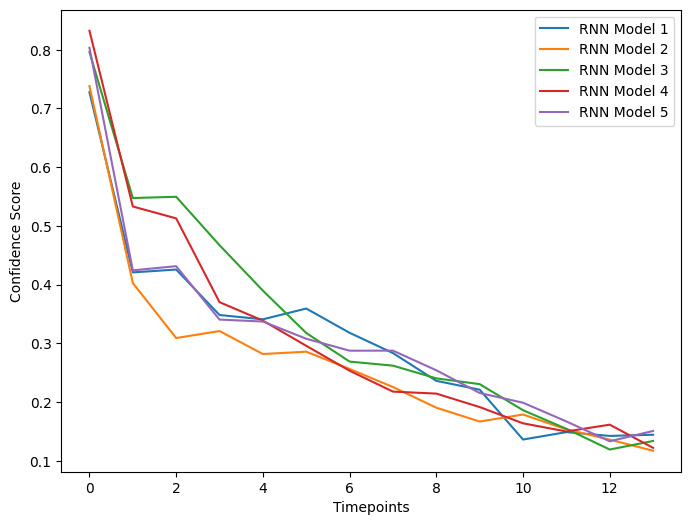

In [14]:
plt.figure(figsize=(8, 6))

for i in range(5):
    plt.plot(confidence_avg[i], label=f'RNN Model {i+1}')

plt.xlabel('Timepoints')
plt.ylabel('Confidence Score')
plt.legend()
plt.show()

(5, 1, 14)
(5, 14)


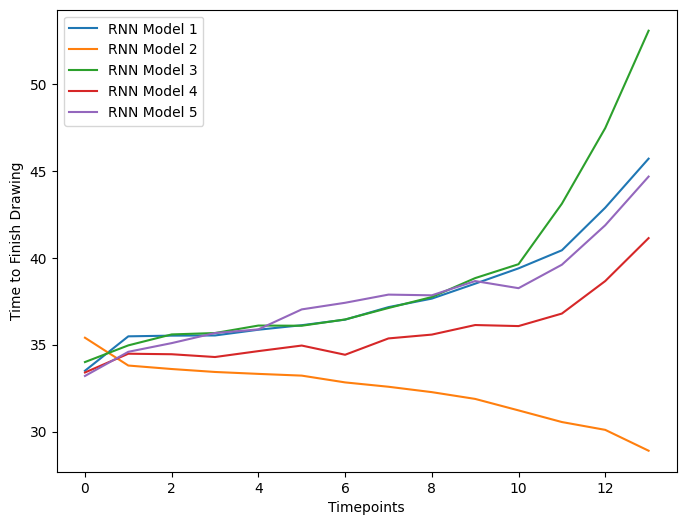

In [61]:
# Average over axis 1 and keep the dimension
confidence_time = times.mean(axis=1, keepdims=True)

print(confidence_time.shape)  # Output: (5, 1, 14)
confidence_time = confidence_time.squeeze(axis=1)  # Now shape: (5, 14)
print(confidence_time.shape)  # Output: (5, 1, 14)

plt.figure(figsize=(8, 6))

for i in range(5):
    plt.plot(confidence_time[i], label=f'RNN Model {i+1}')

plt.xlabel('Timepoints')
plt.ylabel('Time to Finish Drawing')
plt.legend()
plt.show()

### Plot for averaged model

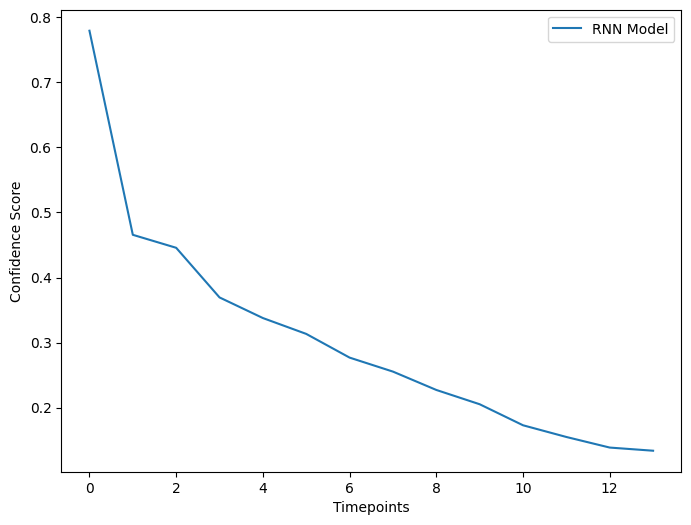

In [35]:
# Average over axis 1 and keep the dimension
confidence_avg = confidences.mean(axis=1, keepdims=True) # (5, 1, 14)
confidence_avg = confidence_avg.squeeze(axis=1)  # Now shape: (5, 14)

true_confidence_avg = confidence_avg.mean(axis=0, keepdims=False)

plt.figure(figsize=(8, 6))

plt.plot(true_confidence_avg, label=f'RNN Model')

plt.xlabel('Timepoints')
plt.ylabel('Confidence Score')
plt.legend()
plt.show()

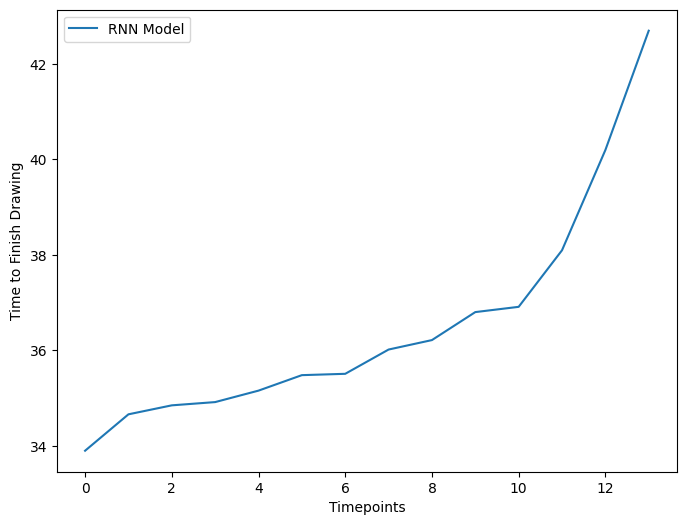

In [62]:
# Average over axis 1 and keep the dimension
avg_time = times.mean(axis=1, keepdims=True) # (5, 1, 14)
avg_time = avg_time.squeeze(axis=1)  # Now shape: (5, 14)

true_time_avg = avg_time.mean(axis=0, keepdims=False)

plt.figure(figsize=(8, 6))

plt.plot(true_time_avg, label=f'RNN Model')

plt.xlabel('Timepoints')
plt.ylabel('Time to Finish Drawing')
plt.legend()
plt.show()

# Plot for smallest

In [63]:
smallest_confidence = [[[0.6216568665433442, 0.7277961813821456, 0.6774847766768652, 0.6138188092317749, 0.5222815892302449, 0.25521715732069883, 0.1316391561324736, 0.13062092581436682, 0.1527070958703776, 0.09999999613673885, 0.09999999613673885], [0.6216568665433442, 0.7277961813821456, 0.6774847766768652, 0.6138188092317749, 0.5222815892302449, 0.25521715732069883, 0.1316391561324736, 0.13062092581436682, 0.1527070958703776, 0.09999999613673885, 0.09999999613673885], [0.6216568665433442, 0.7277961813821456, 0.6774847766768652, 0.6138188092317749, 0.5222815892302449, 0.25521715732069883, 0.1316391561324736, 0.13062092581436682, 0.1527070958703776, 0.09999999613673885, 0.09999999613673885], [0.6216568665433442, 0.7277961813821456, 0.6774847766768652, 0.6138188092317749, 0.5222815892302449, 0.25521715732069883, 0.1316391561324736, 0.13062092581436682, 0.1527070958703776, 0.09999999613673885, 0.09999999613673885], [0.6216568665433442, 0.7277961813821456, 0.6774847766768652, 0.6138188092317749, 0.5222815892302449, 0.25521715732069883, 0.1316391561324736, 0.13062092581436682, 0.1527070958703776, 0.09999999613673885, 0.09999999613673885]], [[0.7092734022176591, 0.738185744471848, 0.6732876862259218, 0.6148863094777516, 0.20331265725736514, 0.4091925469757046, 0.25171971049529535, 0.11498308869614213, 0.08340966953965448, 0.09588504458999011, 0.10000000071108747], [0.7092734022176591, 0.738185744471848, 0.6732876862259218, 0.6148863094777516, 0.20331265725736514, 0.4091925469757046, 0.25171971049529535, 0.11498308869614213, 0.08340966953965448, 0.09588504458999011, 0.10000000071108747], [0.7092734022176591, 0.738185744471848, 0.6732876862259218, 0.6148863094777516, 0.20331265725736514, 0.4091925469757046, 0.25171971049529535, 0.11498308869614213, 0.08340966953965448, 0.09588504458999011, 0.10000000071108747], [0.7092734022176591, 0.738185744471848, 0.6732876862259218, 0.6148863094777516, 0.20331265725736514, 0.4091925469757046, 0.25171971049529535, 0.11498308869614213, 0.08340966953965448, 0.09588504458999011, 0.10000000071108747], [0.7092734022176591, 0.738185744471848, 0.6732876862259218, 0.6148863094777516, 0.20331265725736514, 0.4091925469757046, 0.25171971049529535, 0.11498308869614213, 0.08340966953965448, 0.09588504458999011, 0.10000000071108747]], [[0.8406342749297618, 0.7962247636169196, 0.733881849378231, 0.700517593514109, 0.6261029223987473, 0.5007235756290714, 0.3132664136493335, 0.16030953827184619, 0.0733542077515561, 0.10000000102588066, 0.10000000102588066], [0.8406342749297618, 0.7962247636169196, 0.733881849378231, 0.700517593514109, 0.6261029223987473, 0.5007235756290714, 0.3132664136493335, 0.16030953827184619, 0.0733542077515561, 0.10000000102588066, 0.10000000102588066], [0.8406342749297618, 0.7962247636169196, 0.733881849378231, 0.700517593514109, 0.6261029223987473, 0.5007235756290714, 0.3132664136493335, 0.16030953827184619, 0.0733542077515561, 0.10000000102588066, 0.10000000102588066], [0.8406342749297618, 0.7962247636169196, 0.733881849378231, 0.700517593514109, 0.6261029223987473, 0.5007235756290714, 0.3132664136493335, 0.16030953827184619, 0.0733542077515561, 0.10000000102588066, 0.10000000102588066], [0.8406342749297618, 0.7962247636169196, 0.733881849378231, 0.700517593514109, 0.6261029223987473, 0.5007235756290714, 0.3132664136493335, 0.16030953827184619, 0.0733542077515561, 0.10000000102588066, 0.10000000102588066]], [[0.831252458935196, 0.8324492015890428, 0.7987511245533823, 0.5743452236504072, 0.5160677102264806, 0.48033349980061313, 0.37073834194958577, 0.19847151792629344, 0.099999998438865, 0.099999998438865, 0.099999998438865], [0.831252458935196, 0.8324492015890428, 0.7987511245533823, 0.5743452236504072, 0.5160677102264806, 0.48033349980061313, 0.37073834194958577, 0.19847151792629344, 0.099999998438865, 0.099999998438865, 0.099999998438865], [0.831252458935196, 0.8324492015890428, 0.7987511245533823, 0.5743452236504072, 0.5160677102264806, 0.48033349980061313, 0.37073834194958577, 0.19847151792629344, 0.099999998438865, 0.099999998438865, 0.099999998438865], [0.831252458935196, 0.8324492015890428, 0.7987511245533823, 0.5743452236504072, 0.5160677102264806, 0.48033349980061313, 0.37073834194958577, 0.19847151792629344, 0.099999998438865, 0.099999998438865, 0.099999998438865], [0.831252458935196, 0.8324492015890428, 0.7987511245533823, 0.5743452236504072, 0.5160677102264806, 0.48033349980061313, 0.37073834194958577, 0.19847151792629344, 0.099999998438865, 0.099999998438865, 0.099999998438865]], [[0.7386030211264734, 0.8034157675644382, 0.8123651349556168, 0.7036720574274659, 0.5512350621400401, 0.3924763193089075, 0.26984655971949156, 0.2780672679790991, 0.12045742908033823, 0.1000000040332327, 0.1000000040332327], [0.7386030211264734, 0.8034157675644382, 0.8123651349556168, 0.7036720574274659, 0.5512350621400401, 0.3924763193089075, 0.26984655971949156, 0.2780672679790991, 0.12045742908033823, 0.1000000040332327, 0.1000000040332327], [0.7386030211264734, 0.8034157675644382, 0.8123651349556168, 0.7036720574274659, 0.5512350621400401, 0.3924763193089075, 0.26984655971949156, 0.2780672679790991, 0.12045742908033823, 0.1000000040332327, 0.1000000040332327], [0.7386030211264734, 0.8034157675644382, 0.8123651349556168, 0.7036720574274659, 0.5512350621400401, 0.3924763193089075, 0.26984655971949156, 0.2780672679790991, 0.12045742908033823, 0.1000000040332327, 0.1000000040332327], [0.7386030211264734, 0.8034157675644382, 0.8123651349556168, 0.7036720574274659, 0.5512350621400401, 0.3924763193089075, 0.26984655971949156, 0.2780672679790991, 0.12045742908033823, 0.1000000040332327, 0.1000000040332327]]]

In [64]:
smallest_time = [[[33.6, 33.5, 33.7, 34.1, 34.4, 33.1, 35.3, 40.2, 45.6, 43.3, 61.0], [33.6, 33.5, 33.7, 34.1, 34.4, 33.1, 35.3, 40.2, 45.6, 43.3, 61.0], [33.6, 33.5, 33.7, 34.1, 34.4, 33.1, 35.3, 40.2, 45.6, 43.3, 61.0], [33.6, 33.5, 33.7, 34.1, 34.4, 33.1, 35.3, 40.2, 45.6, 43.3, 61.0], [33.6, 33.5, 33.7, 34.1, 34.4, 33.1, 35.3, 40.2, 45.6, 43.3, 61.0]], [[34.8, 35.4, 34.8, 34.1, 34.5, 33.9, 32.0, 29.4, 24.6, 20.5, 61.0], [34.8, 35.4, 34.8, 34.1, 34.5, 33.9, 32.0, 29.4, 24.6, 20.5, 61.0], [34.8, 35.4, 34.8, 34.1, 34.5, 33.9, 32.0, 29.4, 24.6, 20.5, 61.0], [34.8, 35.4, 34.8, 34.1, 34.5, 33.9, 32.0, 29.4, 24.6, 20.5, 61.0], [34.8, 35.4, 34.8, 34.1, 34.5, 33.9, 32.0, 29.4, 24.6, 20.5, 61.0]], [[34.5, 34.0, 34.4, 34.7, 34.1, 37.6, 36.9, 37.5, 57.8, 61.0, 61.0], [34.5, 34.0, 34.4, 34.7, 34.1, 37.6, 36.9, 37.5, 57.8, 61.0, 61.0], [34.5, 34.0, 34.4, 34.7, 34.1, 37.6, 36.9, 37.5, 57.8, 61.0, 61.0], [34.5, 34.0, 34.4, 34.7, 34.1, 37.6, 36.9, 37.5, 57.8, 61.0, 61.0], [34.5, 34.0, 34.4, 34.7, 34.1, 37.6, 36.9, 37.5, 57.8, 61.0, 61.0]], [[33.7, 33.4, 34.4, 33.8, 34.5, 35.0, 36.3, 37.7, 44.9, 61.0, 61.0], [33.7, 33.4, 34.4, 33.8, 34.5, 35.0, 36.3, 37.7, 44.9, 61.0, 61.0], [33.7, 33.4, 34.4, 33.8, 34.5, 35.0, 36.3, 37.7, 44.9, 61.0, 61.0], [33.7, 33.4, 34.4, 33.8, 34.5, 35.0, 36.3, 37.7, 44.9, 61.0, 61.0], [33.7, 33.4, 34.4, 33.8, 34.5, 35.0, 36.3, 37.7, 44.9, 61.0, 61.0]], [[33.3, 33.2, 33.0, 33.1, 33.7, 35.3, 36.4, 39.4, 37.7, 61.0, 61.0], [33.3, 33.2, 33.0, 33.1, 33.7, 35.3, 36.4, 39.4, 37.7, 61.0, 61.0], [33.3, 33.2, 33.0, 33.1, 33.7, 35.3, 36.4, 39.4, 37.7, 61.0, 61.0], [33.3, 33.2, 33.0, 33.1, 33.7, 35.3, 36.4, 39.4, 37.7, 61.0, 61.0], [33.3, 33.2, 33.0, 33.1, 33.7, 35.3, 36.4, 39.4, 37.7, 61.0, 61.0]]]

In [65]:
smallest_confidence = np.array(smallest_confidence)
smallest_time = np.array(smallest_time)

In [66]:
smallest_confidence.shape

(5, 5, 11)

### Plot for all models

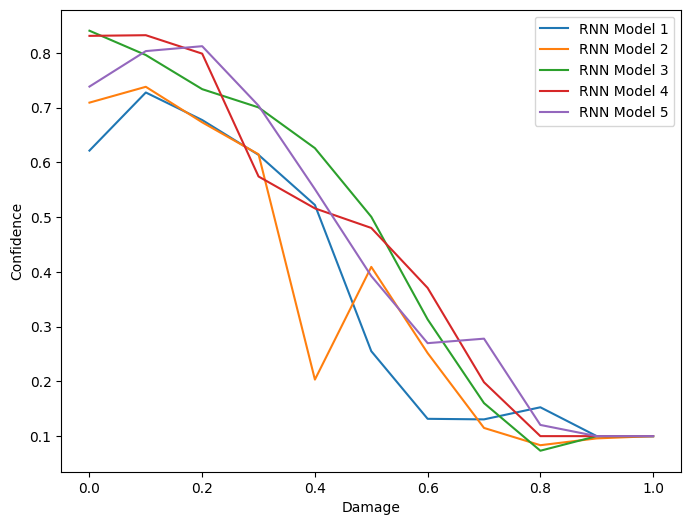

In [69]:
small_confidence_avg = smallest_confidence.mean(axis=1, keepdims=True)

small_confidence_avg = small_confidence_avg.squeeze(axis=1)  # Now shape: (5, 14)

plt.figure(figsize=(8, 6))

x_range = np.arange(0, 11, 1)/10

for i in range(5):
    plt.plot(x_range, small_confidence_avg[i], label=f'RNN Model {i+1}')

plt.xlabel('Damage')
plt.ylabel('Confidence')
plt.legend()
plt.show()

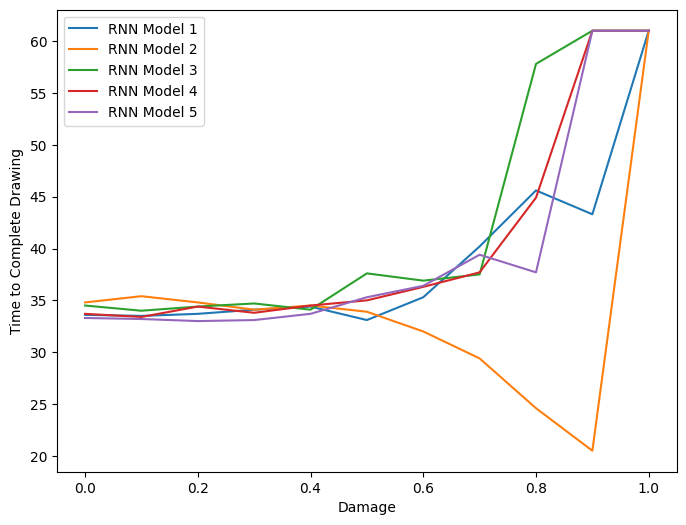

In [ ]:
small_time_avg = smallest_time.mean(axis=1, keepdims=True)

small_time_avg = small_time_avg.squeeze(axis=1)  # Now shape: (5, 14)

plt.figure(figsize=(8, 6))

for i in range(5):
    plt.plot(x_range, small_time_avg[i], label=f'RNN Model {i+1}')

plt.xlabel('Damage')
plt.ylabel('Time to Complete Drawing')
plt.legend()
plt.show()

### Plot for averaged

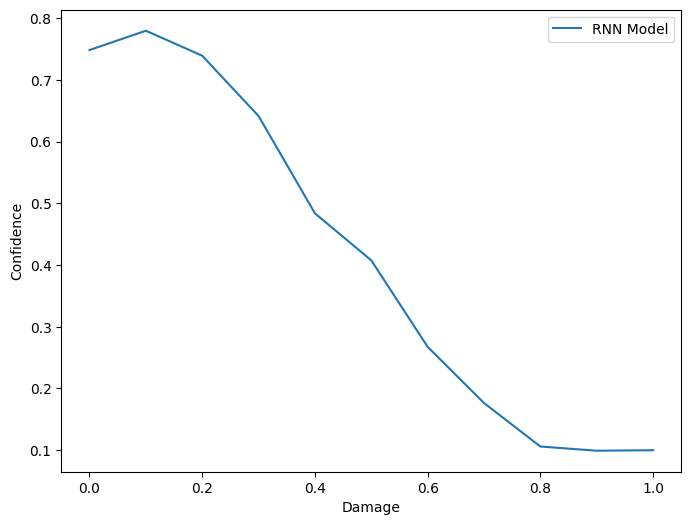

In [75]:
small_confidence_avg = smallest_confidence.mean(axis=1, keepdims=True)
small_confidence_avg = small_confidence_avg.squeeze(axis=1)  # Now shape: (5, 14)
true_small_confidence_avg = small_confidence_avg.mean(axis=0, keepdims=False)


plt.figure(figsize=(8, 6))

plt.plot(x_range, true_small_confidence_avg, label=f'RNN Model')

plt.xlabel('Damage')
plt.ylabel('Confidence')
plt.legend()
plt.show()

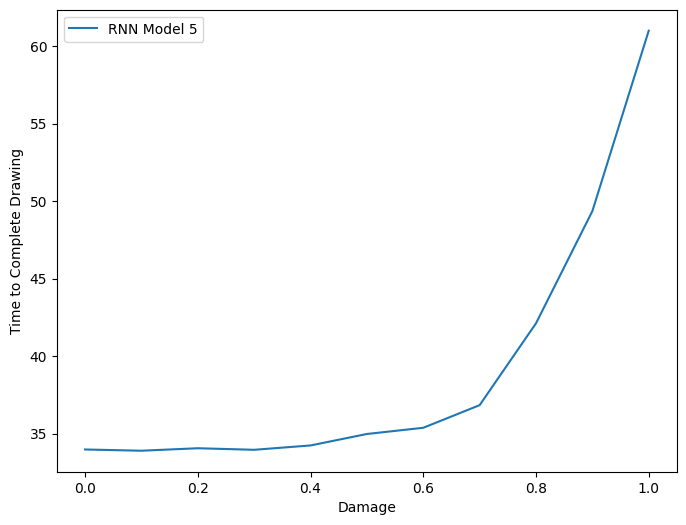

In [76]:
small_time_avg = smallest_time.mean(axis=1, keepdims=True)
small_time_avg = small_time_avg.squeeze(axis=1)  # Now shape: (5, 14)
true_small_time_avg = small_time_avg.mean(axis=0, keepdims=False)

plt.figure(figsize=(8, 6))

plt.plot(x_range, true_small_time_avg, label=f'RNN Model {i+1}')

plt.xlabel('Damage')
plt.ylabel('Time to Complete Drawing')
plt.legend()
plt.show()

# Plot for blockage, reflection, filtering

In [77]:
blockage_confidences = [[[0.7277928326185792, 0.361162489588346, 0.22335154084158035, 0.08745994349463451, 0.15631114967244683, 0.06947969554606023, 0.10022664221304449, 0.10114292446104334, 0.09975177486648648, 0.09957761633350252, 0.1000000009784087]], [[0.7381845249608159, 0.32614783409989745, 0.12597964706998874, 0.20283651885838214, 0.16668540649424599, 0.14126146383010052, 0.1536592011932405, 0.09862760980103916, 0.10000000026563001, 0.10000002349486806, 0.10000000033802306]], [[0.7962175575643777, 0.5656852940482532, 0.33493402734217964, 0.10353722814849331, 0.11219260542023264, 0.07943347360416739, 0.1111688796628418, 0.15438768664328792, 0.11583361578505787, 0.1000000030586324, 0.10000000183702588]], [[0.8324478420213562, 0.5394614535393679, 0.43407841600579566, 0.12363782334551161, 0.08373355715515143, 0.20000156448005563, 0.10542459890824582, 0.10037737227608012, 0.10003120996591948, 0.0930014935384767, 0.09999999695046433]], [[0.8034188939852175, 0.4558929422724759, 0.2469438511471702, 0.11274192874942095, 0.03154860664805113, 0.19296307739167776, 0.1128087028018399, 0.09997423951969311, 0.08872391666166887, 0.1000000010615815, 0.10000000356154318]]]

blockage_times = [[[33.5, 35.7, 38.9, 45.8, 60.4, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0]], [[35.4, 32.8, 32.0, 27.6, 24.0, 19.9, 19.4, 61.0, 61.0, 61.0, 61.0]], [[34.0, 36.0, 38.0, 57.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0]], [[33.4, 35.0, 36.7, 56.8, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0]], [[33.2, 35.9, 40.5, 50.7, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0]]]

reflect_confidences = [[[0.7277928326185792, 0.4731819829000461, 0.35227914861272047, 0.4219052208598142, 0.3187388927193251, 0.19200640846374684, 0.20934500481333798, 0.11173657888049093, 0.1193363673116653, 0.18287306466298153, 0.09767764862410248]], [[0.7381845249608159, 0.40628478280757124, 0.41213311918023293, 0.42060247212652974, 0.24192161273572238, 0.27920236382215535, 0.28478425004985297, 0.20242491134096188, 0.1938085996716063, 0.2196762447753195, 0.14296732129680306]], [[0.7962175575643777, 0.7783410377241671, 0.5925983368151355, 0.5700852554357625, 0.39586694022791774, 0.20290162969862738, 0.1333443272592579, 0.23521664732037412, 0.16058766312854145, 0.10897821541121766, 0.11386225724527596]], [[0.8324478420213562, 0.6654382760520093, 0.41948974300729674, 0.5269977763848942, 0.3932468485050397, 0.39966752850039616, 0.2282514675210648, 0.1349936731514335, 0.06310792255510927, 0.04612737259288154, 0.02981425633636036]], [[0.8034188939852175, 0.7260926128271967, 0.5157537763457094, 0.4287988320668556, 0.31090005035873414, 0.25940329742949814, 0.3924147430661817, 0.15374909010348667, 0.21354875901747672, 0.15900192798561874, 0.12235844979331996]]]   

reflect_times = [[[33.5, 34.4, 35.2, 37.3, 40.8, 41.4, 43.9, 50.9, 55.0, 61.0, 61.0]], [[35.4, 33.9, 34.0, 32.3, 30.6, 29.9, 28.6, 27.3, 24.0, 22.8, 21.1]], [[34.0, 34.2, 35.2, 35.7, 42.2, 49.0, 61.0, 61.0, 61.0, 61.0, 61.0]], [[33.4, 33.8, 33.6, 34.7, 35.1, 40.6, 43.3, 58.8, 61.0, 61.0, 61.0]], [[33.2, 33.7, 35.1, 39.9, 43.4, 45.6, 40.5, 61.0, 61.0, 61.0, 61.0]]]

filter_confidences = [[[0.7277928326185792, 0.24904562246382111, 0.052723924687644697, 0.22011828804759087, 0.09180416312790071, 0.048214976055568855, 0.17742275609108898, 0.028408750547642525, 0.058622395715997866, 0.15565186370938816, 0.03886052144256781]], [[0.7381845249608159, 0.08840028843698747, 0.14037081401976265, 0.2152678764718873, 0.17065275601050733, 0.16528729445410711, 0.11683128152684812, 0.1058605275087789, 0.12249096586363542, 0.04685541977125844, 0.11416194703075236]], [[0.7962175575643777, 0.25756882814045123, 0.06692051179703176, 0.04900383442112529, 0.07346015896397007, 0.005745742641053404, 0.05451182160962942, 0.24170033049035014, 0.047622713966167754, 0.09256621213066488, 0.16951587233883267]], [[0.8324478420213562, 0.021801074501464086, 0.10619101456723623, 0.053261666526677666, 0.14528940982851907, 0.23054673599279743, 0.03140478817842728, 0.03949389626360812, 0.059977598334704105, 0.18298166896477808, 0.22917309746016262]], [[0.8034188939852175, 0.26562365415748557, 0.298777154943682, 0.09516120280440421, 0.14180739838767495, 0.009978392864641973, 0.06036494527386147, 0.025338460244328575, 0.12752674715737863, 0.06683044562018811, 0.030336578834915296]]]

filter_times = [[[33.5, 38.2, 35.9, 35.6, 42.8, 37.0, 38.3, 47.8, 38.4, 42.6, 55.3]], [[35.4, 34.6, 32.5, 34.7, 35.8, 32.2, 28.7, 31.8, 28.0, 25.7, 24.2]], [[34.0, 33.0, 41.7, 40.2, 44.6, 43.5, 36.1, 59.8, 54.9, 61.0, 41.2]], [[33.4, 35.9, 35.1, 36.6, 38.9, 44.7, 36.2, 33.0, 28.2, 42.9, 38.4]], [[33.2, 33.9, 31.9, 32.5, 27.8, 31.6, 32.9, 31.9, 40.7, 51.9, 56.9]]]

In [78]:
blockage_confidences = np.array(blockage_confidences)
blockage_times = np.array(blockage_times)
reflect_confidences = np.array(reflect_confidences)
reflect_times = np.array(reflect_times)
filter_confidences = np.array(filter_confidences)
filter_times = np.array(filter_times)

In [79]:
blockage_confidences.shape

(5, 1, 11)

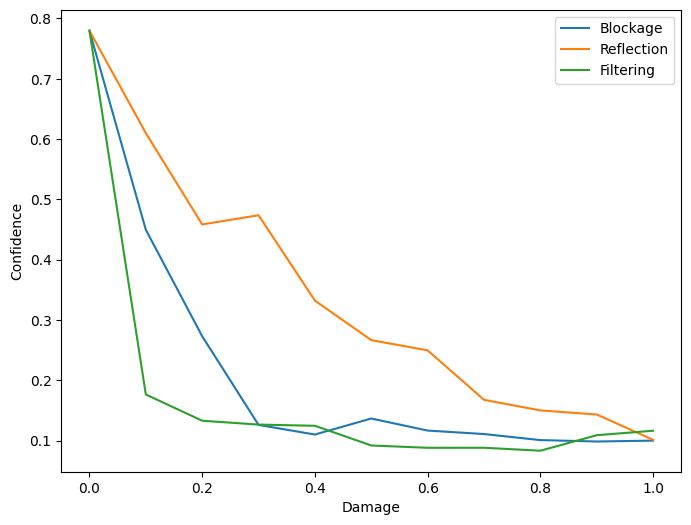

In [80]:
blockage_confidence_avg = blockage_confidences.squeeze(axis=1)  # Now shape: (5, 14)
blockage_confidence_avg = blockage_confidence_avg.mean(axis=0, keepdims=False)

reflect_confidence_avg = reflect_confidences.squeeze(axis=1)  # Now shape: (5, 14)
reflect_confidence_avg = reflect_confidence_avg.mean(axis=0, keepdims=False)

filter_confidences_avg = filter_confidences.squeeze(axis=1)  # Now shape: (5, 14)
filter_confidences_avg = filter_confidences_avg.mean(axis=0, keepdims=False)

plt.figure(figsize=(8, 6))

plt.plot(x_range, blockage_confidence_avg, label=f'Blockage')
plt.plot(x_range, reflect_confidence_avg, label=f'Reflection')
plt.plot(x_range, filter_confidences_avg, label=f'Filtering')

plt.xlabel('Damage')
plt.ylabel('Confidence')
plt.legend()
plt.show()

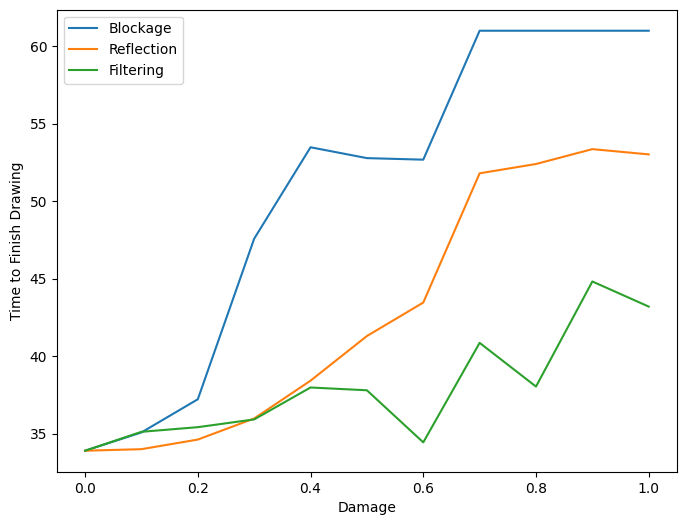

In [82]:
blockage_time_avg = blockage_times.squeeze(axis=1)  # Now shape: (5, 14)
blockage_time_avg = blockage_time_avg.mean(axis=0, keepdims=False)

reflect_time_avg = reflect_times.squeeze(axis=1)  # Now shape: (5, 14)
reflect_time_avg = reflect_time_avg.mean(axis=0, keepdims=False)

filter_time_avg = filter_times.squeeze(axis=1)  # Now shape: (5, 14)
filter_time_avg = filter_time_avg.mean(axis=0, keepdims=False)

plt.figure(figsize=(8, 6))

plt.plot(x_range, blockage_time_avg, label=f'Blockage')
plt.plot(x_range, reflect_time_avg, label=f'Reflection')
plt.plot(x_range, filter_time_avg, label=f'Filtering')

plt.xlabel('Damage')
plt.ylabel('Time to Finish Drawing')
plt.legend()
plt.show()